In [130]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.segmentation import slic
from skimage import segmentation
from skimage.segmentation import flood

# Segmentación por crecimiento de regiones

## Cargue la imagen de trabajo y visualícela.

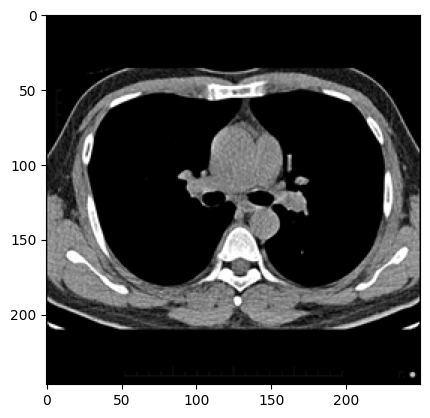

In [131]:
chest = cv2.imread("images/Chest.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(chest, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

## Manualmente, usando paint, cree una máscara asociada al área oscura que corresponde a los pulmones, tratando de respetar la región de la manera más precisa posible.

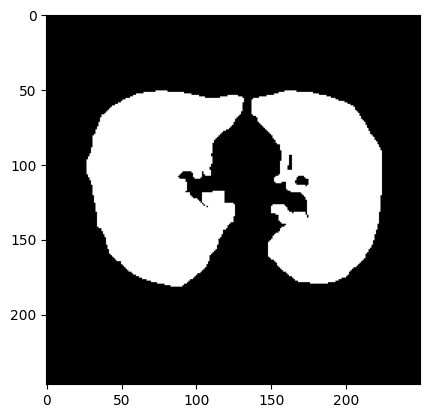

In [132]:
chest_mask= cv2.imread("images/Chest Mask.png", cv2.IMREAD_GRAYSCALE)
for i in range(len(chest_mask)):
    for j in range(len(chest_mask[i])):
        if chest_mask[i][j] > 0:
            chest_mask[i][j] = True
        else:
            chest_mask[i][j] = False
plt.imshow(chest_mask, cmap= 'gray')
plt.show()

## Usando ahora dos semillas, utilice el algoritmo de crecimiento de regiones para segmentar de forma automática el área de los pulmones. Pruebe con varios valores de tolerancia.

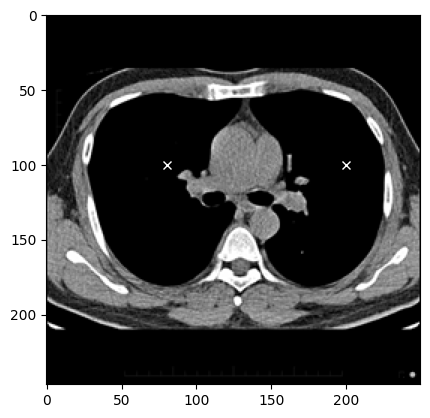

In [133]:
p1 = (80,100)
p2 = (200,100)

plt.imshow(chest, cmap= 'gray', vmin = 0, vmax= 255)
plt.plot([p1[0]], [p1[1]], marker='x', color='white')
plt.plot([p2[0]], [p2[1]], marker='x', color='white')
plt.show()

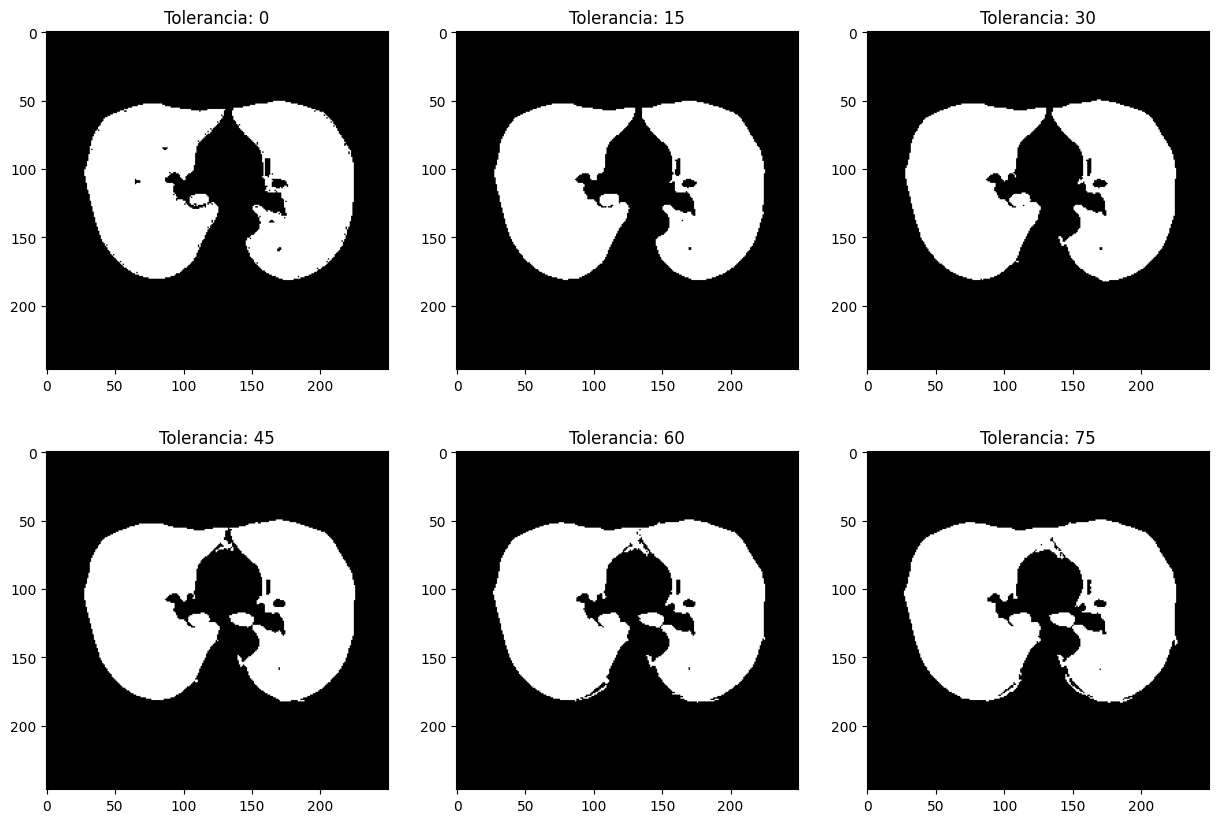

In [134]:
tol = [[0, 15,30],
       [45, 60,75]] 
fig, axes = plt.subplots(len(tol),len(tol[0]), figsize = (15,10))
for i in range(len(tol)):
    for j in range(len(tol[i])):
        A = tol[i][j]
        mascara1 = flood(chest, (p1[1], p1[0]), tolerance=A)
        mascara2 = flood(chest,  (p2[1], p2[0]), tolerance=A)

        mascara_final = np.logical_or(mascara1, mascara2)

        axes[i][j].imshow(mascara_final, cmap= 'gray')
        axes[i][j].set_title(f'Tolerancia: {A}')

        if A == 30:
            mascara_ = mascara_final

plt.show()


Como se puede apreciar, con una tolerancia entre 0 y 30 se obtienen muy buenos resultados para obtener la forma de los pulmones.

## Compare ambos resultados. ¿Cómo se puede determinar cualitativamente dos regiones? ¿Cuál segmentación tiene mejor calidad?

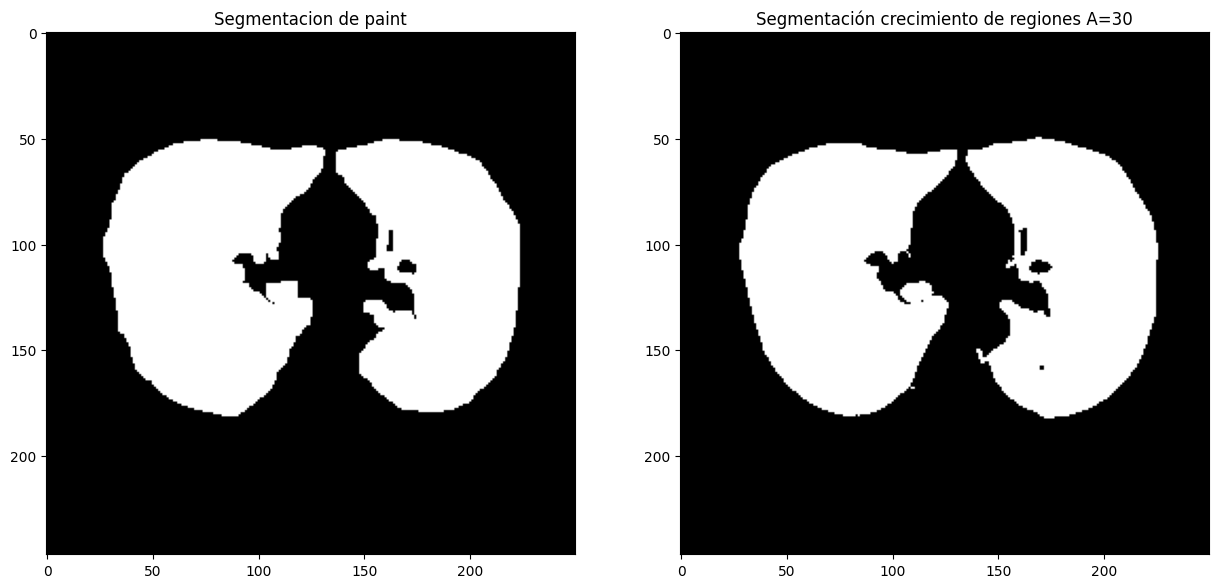

In [135]:
fig, axes = plt.subplots(1,2,  figsize = (15,10))

axes[0].imshow(chest_mask, cmap= 'gray')
axes[0].set_title(f'Segmentacion de paint')

axes[1].imshow(mascara_, cmap= 'gray')
axes[1].set_title(f'Segmentación crecimiento de regiones A=30')

plt.show()


Como se puede observar, la segmentación en paint cubre de peor forma los bordes de los pulmones, y esto se instensifica en las zonas cerradas o rodeadas. Al punto que no tiene la resolución para distinguir el punto negro en el pulmon derecho. En terminos de covertura esa es similar y se puede decir que las mismas zonas son segmentadas por los mismos métodos. Sin embargo la forma en paint es inconsistente y cada vez se obtendrá un resultado distinto. Mientras que si se utiliza la misma tolerancia y puntos de inicio el método por crecimiento de regiones siempre será igual. Por la cosas mencionadas anteriormente se puede conclui que el metodo de crecimiento de regiones es da una mejor segmentación.

## Investigue el coeficiente de Sorensen-Dice. Esta es una medida de la similitud entre dos áreas segmentadas. Aplíquelo sobre las segmentaciones del punto 3 y 4. ¿Cómo puede interpretar el resultado? ¿Respalda el análisis cualitativo el valor obtenido?

In [136]:
mascara_.shape

(247, 250)

In [137]:
chest_mask.shape

(247, 250)

In [139]:
intersection = 0
for i in range(247):
    for j in range(250):
        if mascara_[i][j] == chest_mask[i][j] and chest_mask[i][j]:
            intersection += 1
intersection

16932

In [140]:
dice = (2*intersection)/(mascara_.sum() + chest_mask.sum())
"Dice", dice

('Dice', np.float64(0.971205690030974))

Esto significa que ambas máscaras tienen una similitud de alrededor del 97% y que solo discrepan un 3%. Por lo que se puede decir que ambas máscaras son muy similares. Esto respalda los análisis cualitativos, pues ese 3% de discrepancia representa las diferencias analizadas como la forma de los bordes y de las zonas encerradas, y además se puede cuantificar que estas diferencias son poco relevantes ya que solo constituyen un 3% de la máscara.